# An√°lisis Exploratorio de Datos - Siniestros de Seguros

## Objetivo
Realizar un an√°lisis exploratorio exhaustivo del dataset de siniestros desde la perspectiva de un actuario de pricing, con el fin de:

1. **Comprender la estructura y calidad de los datos** disponibles para la modelaci√≥n actuarial
2. **Identificar variables explicativas relevantes** para un modelo GLM de frecuencia de siniestros
3. **Detectar patrones de riesgo y segmentaci√≥n** que permitan una tarificaci√≥n diferenciada
4. **Evaluar la distribuci√≥n de la siniestralidad** por diferentes factores de riesgo
5. **Preparar recomendaciones para el dise√±o del modelo GLM** de pricing

**Dataset:** `Muestra_Siniestros_4.csv` - Muestra de p√≥lizas de seguros de autom√≥viles

**Enfoque Actuarial:** An√°lisis orientado a la identificaci√≥n de variables predictivas para la construcci√≥n de un modelo de frecuencia de siniestros que permita establecer primas t√©cnicas diferenciadas por perfil de riesgo.

## Contexto del Negocio
En el sector asegurador, la correcta identificaci√≥n y cuantificaci√≥n de factores de riesgo es fundamental para:
- Mantener la solvencia de la compa√±√≠a mediante una tarificaci√≥n adecuada
- Competir efectivamente en el mercado con primas justas y atractivas  
- Evitar la selecci√≥n adversa mediante la segmentaci√≥n apropiada del riesgo
- Cumplir con los requerimientos regulatorios de solvencia y reservas t√©cnicas

## 1. Carga de Librer√≠as y Datos

In [32]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(VIM)
library(DataExplorer)
library(gridExtra)
library(scales)
library(lubridate)
library(knitr)
library(DT)
library(tidyr)

if(!dir.exists("../images")) {
  dir.create("../images")
}

save_plot <- function(plot, filename, width = 10, height = 6) {
  ggsave(paste0("../images/", filename), plot = plot, 
         width = width, height = height, dpi = 300, units = "in")
}

In [33]:
data <- read.csv("../data/input/Muestra_Siniestros_4.csv", stringsAsFactors = FALSE)

cat("Dataset cargado exitosamente.\n")
cat("Dimensiones:", nrow(data), "filas x", ncol(data), "columnas\n")

Dataset cargado exitosamente.
Dimensiones: 5000 filas x 18 columnas


## 2. Exploraci√≥n Inicial de la Estructura

In [34]:
str(data)

'data.frame':	5000 obs. of  18 variables:
 $ Amparo         : chr  NA NA NA NA ...
 $ Amp            : chr  NA NA NA NA ...
 $ SumaDePagos    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Modelo         : int  2013 2010 2012 2008 2008 2007 2012 2007 2010 2011 ...
 $ Color          : chr  "ROJO" "PLATA" "PLATA" "BLANCO" ...
 $ Carroceria     : chr  "SEDAN" "HATCHBACK" "SEDAN" "SEDAN" ...
 $ MARCA          : chr  "HYUNDAI" "HYUNDAI" "HYUNDAI" "HYUNDAI" ...
 $ Referencia1    : chr  "VELOSTER" "ATOS [2]" "ACCENT i25" "ATOS [2]" ...
 $ Referencia2    : chr  "COUPE" "PRIME" "1.4L" "PRIME" ...
 $ CLASE_FASECOLDA: chr  "AUTOMOVIL" "AUTOMOVIL" "AUTOMOVIL" "AUTOMOVIL TAXI" ...
 $ TIPO_VEHICULO  : chr  "Livianos" "Livianos" "Livianos" "Livianos" ...
 $ SERVICIO       : chr  "Particular" "Particular" "Particular" "Particular" ...
 $ Sexo_Aseg      : chr  "F" "M" "F" "M" ...
 $ Edad           : int  34 67 32 0 53 35 65 0 44 0 ...
 $ Desde          : chr  "2011-09-29" "2011-10-01" "2012-02-14" "2012-0

In [35]:
head(data, 10)

Amparo Amp SumaDePagos Modelo Color      Carroceria MARCA   Referencia1  
1  NA     NA  NA          2013   ROJO       SEDAN      HYUNDAI VELOSTER     
2  NA     NA  NA          2010   PLATA      HATCHBACK  HYUNDAI ATOS [2]     
3  NA     NA  NA          2012   PLATA      SEDAN      HYUNDAI ACCENT i25   
4  NA     NA  NA          2008   BLANCO     SEDAN      HYUNDAI ATOS [2]     
5  NA     NA  NA          2008   VINO TINTO SEDAN      HYUNDAI ACCENT VISION
6  NA     NA  NA          2007   PLATA      HATCHBACK  HYUNDAI ATOS [2]     
7  NA     NA  NA          2012   ROJO       HATCHBACK  HYUNDAI i10          
8  NA     NA  NA          2007   BLANCO     FURGON     HYUNDAI HD           
9  NA     NA  NA          2010   BLANCO     HATCHBACK  HYUNDAI i10          
10 NA     NA  NA          2011   BLANCO     SEDAN      HYUNDAI i10          
   Referencia2 CLASE_FASECOLDA TIPO_VEHICULO SERVICIO   Sexo_Aseg Edad
1  COUPE       AUTOMOVIL       Livianos      Particular F         34  
2  PRIME       AUTOMOVIL       Livianos      Particular M         67  
3  1.4L        AUTOMOVIL       Livianos      Particular F         32  
4  PRIME       AUTOMOVIL TAXI  Livianos      Particular M          0  
5  GLS         AUTOMOVIL       Livianos      Particular F         53  
6  SANTRO      AUTOMOVIL       Livianos      Particular F         35  
7  GL          AUTOMOVIL       Livianos      Particular F         65  
8  65          FURGON          Pesados       Publico    NA         0  
9  GL          AUTOMOVIL       Livianos      Particular F         44  
10 GL          AUTOMOVIL       Livianos      Particular F          0  
   Desde      Hasta      Vr_Comercial Pago
1  2011-09-29 2012-11-14 56490000     No  
2  2011-10-01 2012-10-01 16400000     No  
3  2012-02-14 2013-02-14 34700000     No  
4  2012-05-30 2013-05-30 12300000     No  
5  2011-06-06 2012-06-06 23400000     No  
6  2012-06-23 2013-06-23 16000000     No  
7  2011-09-05 2012-09-05 24900000     No  
8  2012-07-03 2013-07-03 39800000     No  
9  2012-07-01 2013-07-01 21250000     No  
10 2012-08-10 2013-08-10 20500000     No

In [36]:
summary(data)

    Amparo              Amp             SumaDePagos           Modelo    
 Length:5000        Length:5000        Min.   :       0   Min.   :1993  
 Class :character   Class :character   1st Qu.:   77500   1st Qu.:2008  
 Mode  :character   Mode  :character   Median : 1739484   Median :2010  
                                       Mean   : 3622724   Mean   :2009  
                                       3rd Qu.: 4000000   3rd Qu.:2012  
                                       Max.   :38868000   Max.   :2013  
                                       NA's   :4320                     
    Color            Carroceria           MARCA           Referencia1       
 Length:5000        Length:5000        Length:5000        Length:5000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

## 3. Descripci√≥n Detallada del Dataset

### 3.1 Estructura General y Contexto Actuarial

In [37]:
columnas <- names(data)
cat("Variables en el dataset:\n")
for(i in 1:length(columnas)) {
  cat(paste(i, ".", columnas[i], "\n"))
}

Variables en el dataset:
1 . Amparo 
2 . Amp 
3 . SumaDePagos 
4 . Modelo 
5 . Color 
6 . Carroceria 
7 . MARCA 
8 . Referencia1 
9 . Referencia2 
10 . CLASE_FASECOLDA 
11 . TIPO_VEHICULO 
12 . SERVICIO 
13 . Sexo_Aseg 
14 . Edad 
15 . Desde 
16 . Hasta 
17 . Vr_Comercial 
18 . Pago 


In [38]:
data_clean <- data %>%
  mutate(
    Modelo = as.numeric(Modelo),
    Edad = as.numeric(Edad),
    Vr_Comercial = as.numeric(Vr_Comercial),
    Desde = as.Date(Desde),
    Hasta = as.Date(Hasta)
  )

variables_numericas <- c("Modelo", "Edad", "Vr_Comercial")
variables_categoricas <- c("Amp", "Color", "Carroceria", "MARCA", "Referencia1", 
                          "Referencia2", "CLASE_FASECOLDA", "TIPO_VEHICULO", 
                          "SERVICIO", "Sexo_Aseg", "Pago")
variables_fechas <- c("Desde", "Hasta")

cat("=== RESUMEN ESTRUCTURAL DEL DATASET ===\n")
cat("Variables num√©ricas:", length(variables_numericas), "\n")
cat("Variables categ√≥ricas:", length(variables_categoricas), "\n")
cat("Variables de fecha:", length(variables_fechas), "\n")
cat("Total de variables:", ncol(data_clean), "\n")
cat("Total de registros (p√≥lizas):", nrow(data_clean), "\n\n")

cat("=== DESCRIPCI√ìN DE VARIABLES DESDE PERSPECTIVA ACTUARIAL ===\n\n")

cat("VARIABLES NUM√âRICAS (Potencial uso como variables continuas en GLM):\n")
cat("1. Modelo: A√±o del modelo del veh√≠culo - proxy de antig√ºedad y tecnolog√≠a\n")
cat("2. Edad: Edad del asegurado - factor de riesgo demogr√°fico clave\n") 
cat("3. Vr_Comercial: Valor comercial del veh√≠culo - exposici√≥n al riesgo y suma asegurada\n\n")

cat("VARIABLES CATEG√ìRICAS (Potencial uso como factores en GLM):\n")
cat("1. SERVICIO: Uso del veh√≠culo (Particular/P√∫blico) - factor de exposici√≥n cr√≠tico\n")
cat("2. TIPO_VEHICULO: Clasificaci√≥n t√©cnica - influye en riesgo de da√±os\n")
cat("3. Sexo_Aseg: G√©nero del asegurado - variable demogr√°fica tradicional\n")
cat("4. MARCA: Fabricante del veh√≠culo - proxy de calidad/seguridad\n")
cat("5. Color: Color del veh√≠culo - posible factor de visibilidad/robo\n")
cat("6. Carroceria: Tipo de carrocer√≠a - relacionado con uso y exposici√≥n\n")
cat("7. CLASE_FASECOLDA: Clasificaci√≥n oficial colombiana - est√°ndar del mercado\n")
cat("8. Pago: VARIABLE OBJETIVO - Ocurrencia de siniestro (Si/No)\n\n")

cat("VARIABLES DE FECHAS (Para c√°lculo de exposici√≥n):\n")
cat("1. Desde/Hasta: Per√≠odo de vigencia de la p√≥liza - base para exposici√≥n temporal\n")

=== RESUMEN ESTRUCTURAL DEL DATASET ===
Variables num√©ricas: 3 
Variables categ√≥ricas: 11 
Variables de fecha: 2 
Total de variables: 18 
Total de registros (p√≥lizas): 5000 

=== DESCRIPCI√ìN DE VARIABLES DESDE PERSPECTIVA ACTUARIAL ===

VARIABLES NUM√âRICAS (Potencial uso como variables continuas en GLM):
1. Modelo: A√±o del modelo del veh√≠culo - proxy de antig√ºedad y tecnolog√≠a
2. Edad: Edad del asegurado - factor de riesgo demogr√°fico clave
3. Vr_Comercial: Valor comercial del veh√≠culo - exposici√≥n al riesgo y suma asegurada

VARIABLES CATEG√ìRICAS (Potencial uso como factores en GLM):
1. SERVICIO: Uso del veh√≠culo (Particular/P√∫blico) - factor de exposici√≥n cr√≠tico
2. TIPO_VEHICULO: Clasificaci√≥n t√©cnica - influye en riesgo de da√±os
3. Sexo_Aseg: G√©nero del asegurado - variable demogr√°fica tradicional
4. MARCA: Fabricante del veh√≠culo - proxy de calidad/seguridad
5. Color: Color del veh√≠culo - posible factor de visibilidad/robo
6. Carroceria: Tipo de carrocer√≠a

## 4. An√°lisis de Valores Faltantes

In [39]:
missing_summary <- data_clean %>%
  summarise_all(~sum(is.na(.))) %>%
  gather(variable, missing_count) %>%
  mutate(missing_pct = round(missing_count / nrow(data_clean) * 100, 2)) %>%
  arrange(desc(missing_count))

kable(missing_summary, 
      col.names = c("Variable", "Valores Faltantes", "Porcentaje (%)"),
      caption = "An√°lisis de Valores Faltantes")



Table: An√°lisis de Valores Faltantes

|Variable        | Valores Faltantes| Porcentaje (%)|
|:---------------|-----------------:|--------------:|
|Amparo          |              4320|           86.4|
|Amp             |              4320|           86.4|
|SumaDePagos     |              4320|           86.4|
|Sexo_Aseg       |               625|           12.5|
|Modelo          |                 0|            0.0|
|Color           |                 0|            0.0|
|Carroceria      |                 0|            0.0|
|MARCA           |                 0|            0.0|
|Referencia1     |                 0|            0.0|
|Referencia2     |                 0|            0.0|
|CLASE_FASECOLDA |                 0|            0.0|
|TIPO_VEHICULO   |                 0|            0.0|
|SERVICIO        |                 0|            0.0|
|Edad            |                 0|            0.0|
|Desde           |                 0|            0.0|
|Hasta           |                 0|    


 Variables sorted by number of missings: 
        Variable Count
          Amparo 0.864
             Amp 0.864
     SumaDePagos 0.864
       Sexo_Aseg 0.125
          Modelo 0.000
           Color 0.000
      Carroceria 0.000
           MARCA 0.000
     Referencia1 0.000
     Referencia2 0.000
 CLASE_FASECOLDA 0.000
   TIPO_VEHICULO 0.000
        SERVICIO 0.000
            Edad 0.000
           Desde 0.000
           Hasta 0.000
    Vr_Comercial 0.000
            Pago 0.000


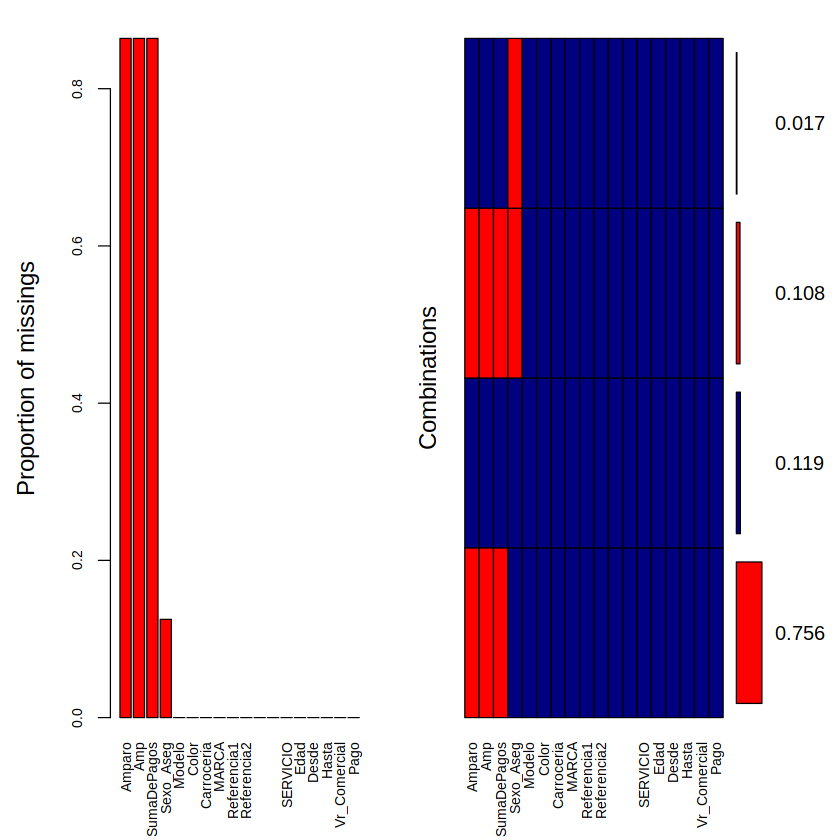

In [40]:
VIM::aggr(data_clean, col = c('navyblue','red'), 
          numbers = TRUE, sortVars = TRUE, 
          labels = names(data_clean), cex.axis = 0.7)

## 5. An√°lisis de Variables Categ√≥ricas

In [41]:
cat("=== AN√ÅLISIS DETALLADO DE VARIABLES CATEG√ìRICAS ===\n\n")

for(var in variables_categoricas) {
  if(var %in% names(data_clean)) {
    cat("VARIABLE:", var, "\n")
    
    cat("Interpretaci√≥n Actuarial:\n")
    if(var == "SERVICIO") {
      cat("- CR√çTICO: Diferenciaci√≥n Particular vs P√∫blico/Comercial\n")
      cat("- Veh√≠culos p√∫blicos: mayor exposici√≥n, m√°s km/a√±o, uso intensivo\n")
      cat("- Variable fundamental para segmentaci√≥n tarifaria\n")
    } else if(var == "Sexo_Aseg") {
      cat("- Variable demogr√°fica tradicional en seguros de auto\n")
      cat("- Diferencias hist√≥ricas en comportamiento de conducci√≥n\n")
      cat("- Puede requerir validaci√≥n estad√≠stica para evitar discriminaci√≥n\n")
    } else if(var == "TIPO_VEHICULO") {
      cat("- Clasificaci√≥n por funci√≥n: influye en patr√≥n de uso\n")
      cat("- Diferentes exposiciones seg√∫n tipo (autom√≥vil, cami√≥n, etc.)\n")
    } else if(var == "MARCA") {
      cat("- Proxy de calidad, seguridad y costo de reparaci√≥n\n")
      cat("- Marcas premium: mayor costo pero mejor seguridad\n")
      cat("- Considerar agrupaci√≥n por frecuencia para GLM\n")
    } else if(var == "Pago") {
      cat("- VARIABLE OBJETIVO: Indicador de ocurrencia de siniestro\n")
      cat("- Base para c√°lculo de frecuencia de siniestros\n")
    }
    
    freq_table <- table(data_clean[[var]], useNA = "ifany")
    freq_df <- data.frame(
      Categoria = names(freq_table),
      Frecuencia = as.numeric(freq_table),
      Porcentaje = round(as.numeric(freq_table) / nrow(data_clean) * 100, 2)
    )
    freq_df <- freq_df[order(-freq_df$Frecuencia), ]
    
    print(kable(freq_df))
    
    cat("An√°lisis de Concentraci√≥n:\n")
    cat("- N√∫mero de categor√≠as √∫nicas:", nrow(freq_df), "\n")
    cat("- Categor√≠a m√°s frecuente:", freq_df$Categoria[1], 
        "(", freq_df$Porcentaje[1], "%)\n")
    
    if(nrow(freq_df) > 1) {
      cat("- Concentraci√≥n top 3:", 
          sum(freq_df$Porcentaje[1:min(3, nrow(freq_df))]), "%\n")
    }
    
    low_freq <- sum(freq_df$Porcentaje < 1)
    if(low_freq > 0) {
      cat("- ALERTA: Categor√≠as con <1% de frecuencia:", low_freq, 
          "- Considerar agrupaci√≥n\n")
    }
    
    cat("Recomendaciones para GLM:\n")
    if(nrow(freq_df) > 10 && var != "Pago") {
      cat("- Demasiadas categor√≠as - considerar agrupaci√≥n tem√°tica\n")
    }
    if(var == "Pago") {
      si_pct <- freq_df$Porcentaje[freq_df$Categoria == "Si"]
      if(length(si_pct) > 0 && si_pct < 5) {
        cat("- ALERTA: Muy baja frecuencia de siniestros - validar datos\n")
      }
    }
    
    cat("\n" %+% paste(rep("=", 60), collapse="") %+% "\n\n")
  }
}

=== AN√ÅLISIS DETALLADO DE VARIABLES CATEG√ìRICAS ===



VARIABLE: Amp 
Interpretaci√≥n Actuarial:


|   |Categoria | Frecuencia| Porcentaje|
|:--|:---------|----------:|----------:|
|8  |NA        |       4320|      86.40|
|3  |PPD       |        518|      10.36|
|7  |RC        |         68|       1.36|
|6  |PTH       |         32|       0.64|
|5  |PTD       |         28|       0.56|
|2  |GT        |         24|       0.48|
|4  |PPH       |          9|       0.18|
|1  |ASI       |          1|       0.02|
An√°lisis de Concentraci√≥n:
- N√∫mero de categor√≠as √∫nicas: 8 
- Categor√≠a m√°s frecuente: NA ( 86.4 %)
- Concentraci√≥n top 3: 98.12 %
- ALERTA: Categor√≠as con <1% de frecuencia: 5 - Considerar agrupaci√≥n
Recomendaciones para GLM:
VARIABLE: Color 
Interpretaci√≥n Actuarial:


|   |Categoria       | Frecuencia| Porcentaje|
|:--|:---------------|----------:|----------:|
|16 |PLATA           |        902|      18.04|
|1  |AMARILLO        |        870|      17.40|
|5  |BLANCO          |        774|      15.48|
|11 |GRIS            |     

## 6. An√°lisis de Variables Num√©ricas

In [42]:
cat("=== AN√ÅLISIS DETALLADO DE VARIABLES NUM√âRICAS ===\n\n")

for(var in variables_numericas) {
  if(var %in% names(data_clean)) {
    cat("VARIABLE:", var, "\n")
    vec <- data_clean[[var]]
    vec_clean <- vec[!is.na(vec)]
    
    if(length(vec_clean) > 0) {
      cat("Interpretaci√≥n Actuarial:\n")
      if(var == "Edad") {
        cat("- Factor de riesgo demogr√°fico fundamental en seguros de auto\n")
        cat("- Conductores j√≥venes y mayores t√≠picamente presentan mayor siniestralidad\n")
        cat("- Requerir√° an√°lisis de curva en U para modelaci√≥n GLM\n")
      } else if(var == "Modelo") {
        cat("- Proxy de antig√ºedad del veh√≠culo (a√±o actual - modelo)\n") 
        cat("- Veh√≠culos muy nuevos: alto valor, mayor exposici√≥n econ√≥mica\n")
        cat("- Veh√≠culos muy antiguos: menor seguridad, mayor riesgo mec√°nico\n")
      } else if(var == "Vr_Comercial") {
        cat("- Suma asegurada aproximada - exposici√≥n econ√≥mica directa\n")
        cat("- Mayor valor = mayor prima pero tambi√©n mayor exposici√≥n a robo\n")
        cat("- Variable clave para establecer la escala de primas\n")
      }
      
      stats <- data.frame(
        Estadistico = c("N v√°lidos", "Media", "Mediana", "Desv. Est√°ndar", 
                       "M√≠nimo", "Q1", "Q3", "M√°ximo", "Rango", "CV (%)", 
                       "Asimetr√≠a", "% Valores Cero", "% Outliers (>Q3+1.5*IQR)"),
        Valor = c(
          length(vec_clean),
          round(mean(vec_clean), 2),
          round(median(vec_clean), 2),
          round(sd(vec_clean), 2),
          min(vec_clean),
          round(quantile(vec_clean, 0.25), 2),
          round(quantile(vec_clean, 0.75), 2),
          max(vec_clean),
          max(vec_clean) - min(vec_clean),
          round(sd(vec_clean) / mean(vec_clean) * 100, 2),
          round((mean(vec_clean) - median(vec_clean)) / sd(vec_clean), 3),
          round(sum(vec_clean == 0) / length(vec_clean) * 100, 2),
          round(sum(vec_clean > (quantile(vec_clean, 0.75) + 1.5 * IQR(vec_clean))) / length(vec_clean) * 100, 2)
        )
      )
      print(kable(stats))
      
      cat("Consideraciones para GLM:\n")
      if(var == "Edad" && sum(vec_clean == 0) > 0) {
        cat("- ALERTA: Valores de edad = 0 requieren limpieza\n")
      }
      if(stats$Valor[stats$Estadistico == "CV (%)"] > 100) {
        cat("- Alta variabilidad - considerar transformaci√≥n logar√≠tmica\n")
      }
      if(abs(as.numeric(stats$Valor[stats$Estadistico == "Asimetr√≠a"])) > 2) {
        cat("- Distribuci√≥n altamente sesgada - transformaci√≥n recomendada\n")
      }
      cat("\n" %+% paste(rep("=", 60), collapse="") %+% "\n\n")
    }
  }
}

=== AN√ÅLISIS DETALLADO DE VARIABLES NUM√âRICAS ===



VARIABLE: Modelo 
Interpretaci√≥n Actuarial:
- Proxy de antig√ºedad del veh√≠culo (a√±o actual - modelo)
- Veh√≠culos muy nuevos: alto valor, mayor exposici√≥n econ√≥mica
- Veh√≠culos muy antiguos: menor seguridad, mayor riesgo mec√°nico


|Estadistico              |    Valor|
|:------------------------|--------:|
|N v√°lidos                | 5000.000|
|Media                    | 2009.150|
|Mediana                  | 2010.000|
|Desv. Est√°ndar           |    3.330|
|M√≠nimo                   | 1993.000|
|Q1                       | 2008.000|
|Q3                       | 2012.000|
|M√°ximo                   | 2013.000|
|Rango                    |   20.000|
|CV (%)                   |    0.170|
|Asimetr√≠a                |   -0.256|
|% Valores Cero           |    0.000|
|% Outliers (>Q3+1.5*IQR) |    0.000|
Consideraciones para GLM:
VARIABLE: Edad 
Interpretaci√≥n Actuarial:
- Factor de riesgo demogr√°fico fundamental en seguros de auto
- Conductores j√≥venes y mayores t√≠picamente present

## 7. An√°lisis de la Variable Objetivo (Pago)

In [43]:
pago_freq <- table(data_clean$Pago, useNA = "ifany")
pago_summary <- data.frame(
  Pago = names(pago_freq),
  Frecuencia = as.numeric(pago_freq),
  Porcentaje = round(as.numeric(pago_freq) / nrow(data_clean) * 100, 2)
)

kable(pago_summary, 
      caption = "Distribuci√≥n de la Variable Objetivo: Pago")

frecuencia_siniestros <- sum(data_clean$Pago == unique(data_clean$Pago)[2], na.rm = TRUE)
total_polizas <- nrow(data_clean)
tasa_siniestralidad <- frecuencia_siniestros / total_polizas

cat("\nM√©tricas Actuariales Clave:\n")
cat("- Total de p√≥lizas:", total_polizas, "\n")
cat("- N√∫mero de siniestros:", frecuencia_siniestros, "\n")
cat("- Tasa de siniestralidad:", round(tasa_siniestralidad * 100, 4), "%\n")



Table: Distribuci√≥n de la Variable Objetivo: Pago

|Pago | Frecuencia| Porcentaje|
|:----|----------:|----------:|
|No   |       4485|       89.7|
|SÔøΩ   |        515|       10.3|


M√©tricas Actuariales Clave:
- Total de p√≥lizas: 5000 
- N√∫mero de siniestros: 515 
- Tasa de siniestralidad: 10.3 %


## 8. Visualizaciones Exploratorias

### 8.1 Distribuci√≥n de Variables Num√©ricas

Gr√°fica exportada: distribucion_variables_numericas.png

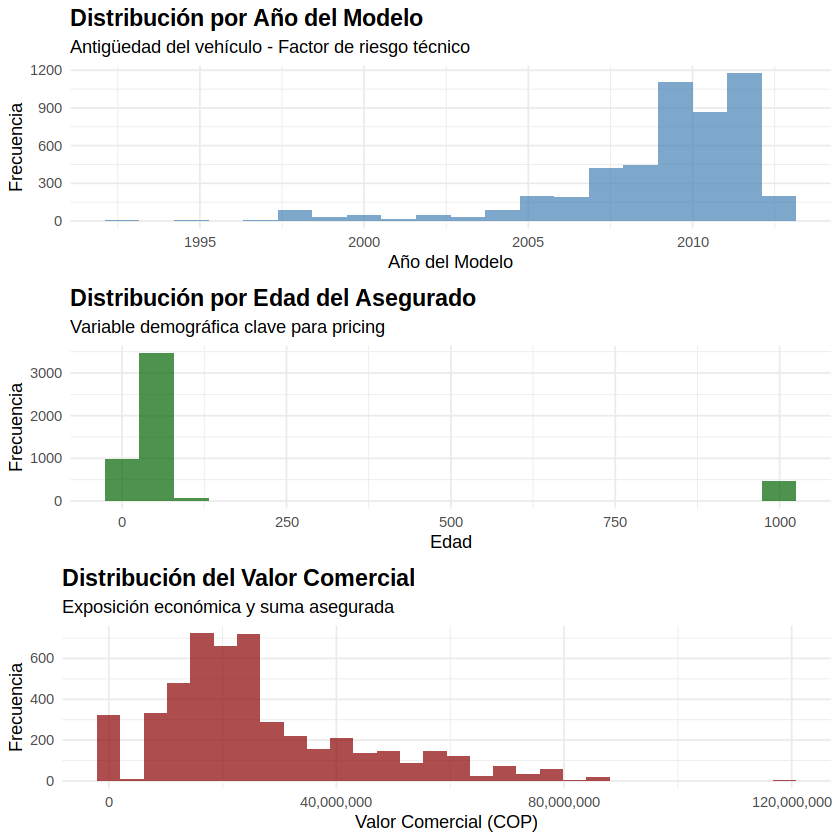

In [44]:
plot_modelo <- ggplot(data_clean, aes(x = Modelo)) +
  geom_histogram(bins = 20, fill = "steelblue", alpha = 0.7) +
  labs(title = "Distribuci√≥n por A√±o del Modelo", 
       x = "A√±o del Modelo", y = "Frecuencia",
       subtitle = "Antig√ºedad del veh√≠culo - Factor de riesgo t√©cnico") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

plot_edad <- ggplot(data_clean, aes(x = Edad)) +
  geom_histogram(bins = 20, fill = "darkgreen", alpha = 0.7) +
  labs(title = "Distribuci√≥n por Edad del Asegurado", 
       x = "Edad", y = "Frecuencia",
       subtitle = "Variable demogr√°fica clave para pricing") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

plot_valor <- ggplot(data_clean, aes(x = Vr_Comercial)) +
  geom_histogram(bins = 30, fill = "darkred", alpha = 0.7) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "Distribuci√≥n del Valor Comercial", 
       x = "Valor Comercial (COP)", y = "Frecuencia",
       subtitle = "Exposici√≥n econ√≥mica y suma asegurada") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

combined_numericas <- grid.arrange(plot_modelo, plot_edad, plot_valor, ncol = 1)

save_plot(combined_numericas, "distribucion_variables_numericas.png", width = 12, height = 16)

cat("Gr√°fica exportada: distribucion_variables_numericas.png")

### 8.2 An√°lisis por Sexo del Asegurado



|Sexo |Pago | Frecuencia| Proporci√≥n (%)|
|:----|:----|----------:|--------------:|
|F    |No   |       1892|          90.44|
|F    |SÔøΩ   |        200|           9.56|
|M    |No   |       2040|          89.36|
|M    |SÔøΩ   |        243|          10.64|

Gr√°fica exportada: analisis_siniestralidad_sexo.png

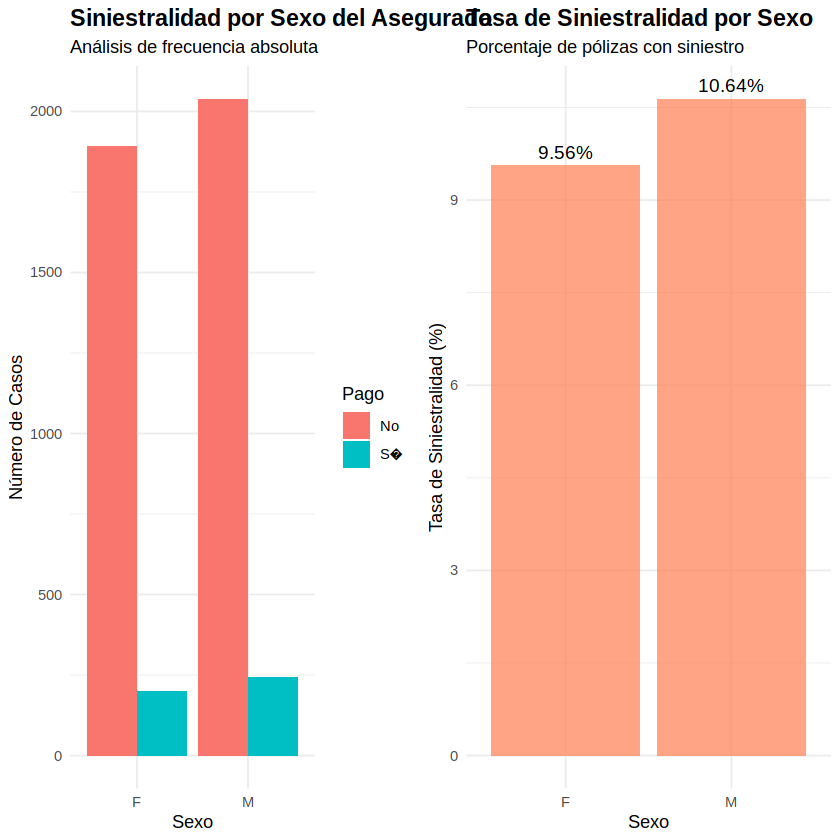

In [45]:
sexo_pago <- data_clean %>%
  filter(!is.na(Sexo_Aseg) & !is.na(Pago)) %>%
  group_by(Sexo_Aseg, Pago) %>%
  summarise(n = n(), .groups = 'drop') %>%
  group_by(Sexo_Aseg) %>%
  mutate(prop = n / sum(n))

plot_sexo_freq <- ggplot(sexo_pago, aes(x = Sexo_Aseg, y = n, fill = Pago)) +
  geom_col(position = "dodge") +
  labs(title = "Siniestralidad por Sexo del Asegurado",
       subtitle = "An√°lisis de frecuencia absoluta",
       x = "Sexo", y = "N√∫mero de Casos", fill = "Pago") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

sexo_tasa <- sexo_pago %>%
  filter(Pago == unique(data_clean$Pago)[2]) %>%
  select(Sexo_Aseg, tasa_siniestralidad = prop) %>%
  mutate(tasa_siniestralidad = tasa_siniestralidad * 100)

plot_sexo_tasa <- ggplot(sexo_tasa, aes(x = Sexo_Aseg, y = tasa_siniestralidad)) +
  geom_col(fill = "coral", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 2), "%")), 
            vjust = -0.5, size = 4) +
  labs(title = "Tasa de Siniestralidad por Sexo",
       subtitle = "Porcentaje de p√≥lizas con siniestro",
       x = "Sexo", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

combined_sexo <- grid.arrange(plot_sexo_freq, plot_sexo_tasa, ncol = 2)

save_plot(combined_sexo, "analisis_siniestralidad_sexo.png", width = 12, height = 6)

kable(sexo_pago %>% 
      select(Sexo_Aseg, Pago, n, prop) %>%
      mutate(prop = round(prop * 100, 2)),
      col.names = c("Sexo", "Pago", "Frecuencia", "Proporci√≥n (%)"))

cat("Gr√°fica exportada: analisis_siniestralidad_sexo.png")

### 8.3 An√°lisis por Tipo de Veh√≠culo



|Tipo Veh√≠culo | Total P√≥lizas| Siniestros| Tasa Siniestralidad (%)|
|:-------------|-------------:|----------:|-----------------------:|
|Pesados       |           143|         16|                 11.1888|
|Livianos      |          4857|        499|                 10.2738|

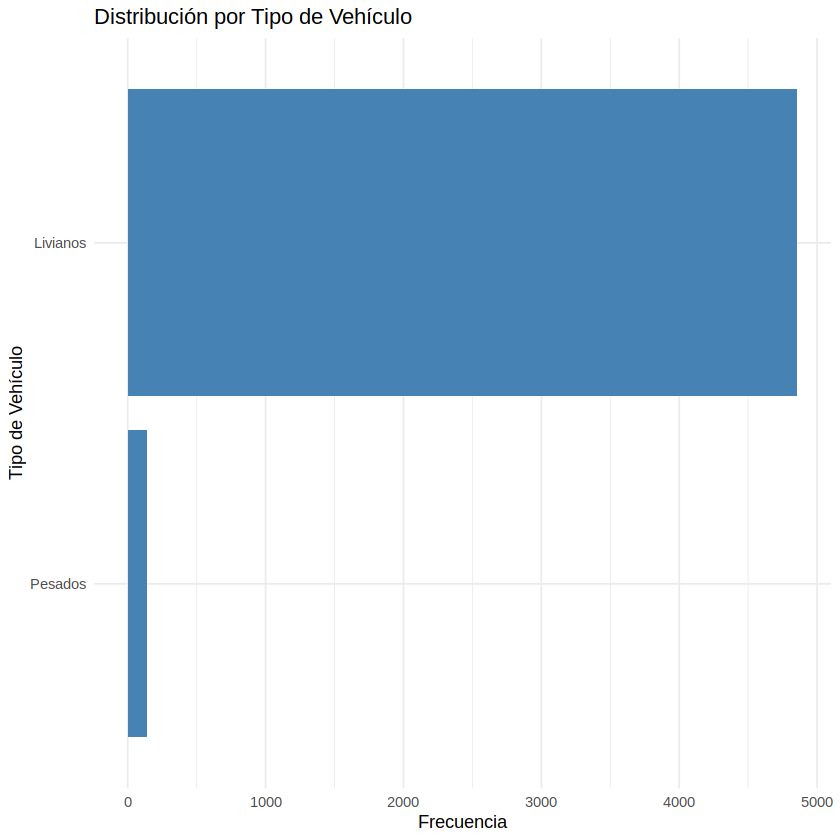

In [46]:
tipo_freq <- data_clean %>%
  filter(!is.na(TIPO_VEHICULO)) %>%
  count(TIPO_VEHICULO, sort = TRUE)

ggplot(tipo_freq, aes(x = reorder(TIPO_VEHICULO, n), y = n)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Distribuci√≥n por Tipo de Veh√≠culo",
       x = "Tipo de Veh√≠culo", y = "Frecuencia") +
  theme_minimal()

tipo_siniestros <- data_clean %>%
  filter(!is.na(TIPO_VEHICULO) & !is.na(Pago)) %>%
  group_by(TIPO_VEHICULO) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  arrange(desc(tasa_siniestralidad))

kable(tipo_siniestros,
      col.names = c("Tipo Veh√≠culo", "Total P√≥lizas", "Siniestros", "Tasa Siniestralidad (%)"))

### 8.4 An√°lisis por Servicio del Veh√≠culo



|Servicio            | Total P√≥lizas| Siniestros| Tasa Siniestralidad (%)|
|:-------------------|-------------:|----------:|-----------------------:|
|Transporte Personal |            14|          2|                 14.2857|
|Oficial             |           264|         32|                 12.1212|
|Particular          |          3774|        394|                 10.4399|
|Publico             |           948|         87|                  9.1772|


IMPORTANCIA ACTUARIAL: La variable SERVICIO muestra diferencias significativas
en siniestralidad, siendo fundamental para la segmentaci√≥n tarifaria.
Veh√≠culos de servicio p√∫blico requieren primas diferenciadas.

Gr√°fica exportada: analisis_servicio_vehiculo.png

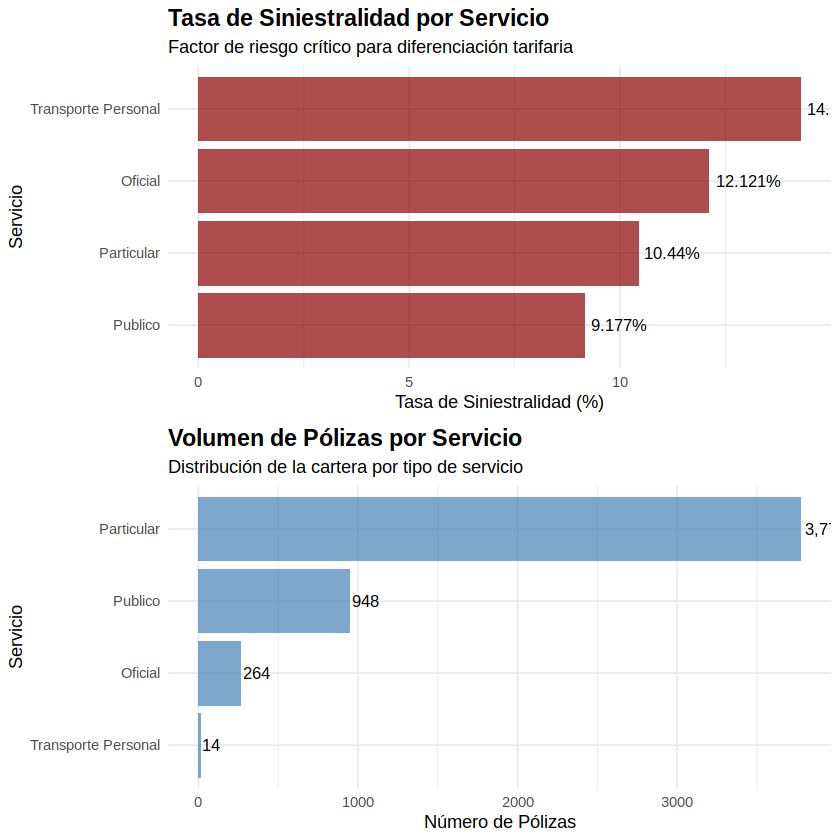

In [47]:
servicio_siniestros <- data_clean %>%
  filter(!is.na(SERVICIO) & !is.na(Pago)) %>%
  group_by(SERVICIO) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  arrange(desc(tasa_siniestralidad))

plot_servicio_tasa <- ggplot(servicio_siniestros, aes(x = reorder(SERVICIO, tasa_siniestralidad), y = tasa_siniestralidad)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Tasa de Siniestralidad por Servicio",
       subtitle = "Factor de riesgo cr√≠tico para diferenciaci√≥n tarifaria",
       x = "Servicio", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

plot_servicio_vol <- ggplot(servicio_siniestros, aes(x = reorder(SERVICIO, total), y = total)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = scales::comma(total)), 
            hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Volumen de P√≥lizas por Servicio",
       subtitle = "Distribuci√≥n de la cartera por tipo de servicio",
       x = "Servicio", y = "N√∫mero de P√≥lizas") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

combined_servicio <- grid.arrange(plot_servicio_tasa, plot_servicio_vol, ncol = 1)

save_plot(combined_servicio, "analisis_servicio_vehiculo.png", width = 12, height = 10)

kable(servicio_siniestros,
      col.names = c("Servicio", "Total P√≥lizas", "Siniestros", "Tasa Siniestralidad (%)"))

cat("\nIMPORTANCIA ACTUARIAL: La variable SERVICIO muestra diferencias significativas\n")
cat("en siniestralidad, siendo fundamental para la segmentaci√≥n tarifaria.\n")
cat("Veh√≠culos de servicio p√∫blico requieren primas diferenciadas.\n\n")

cat("Gr√°fica exportada: analisis_servicio_vehiculo.png")

### 8.5 An√°lisis por Marca de Veh√≠culo

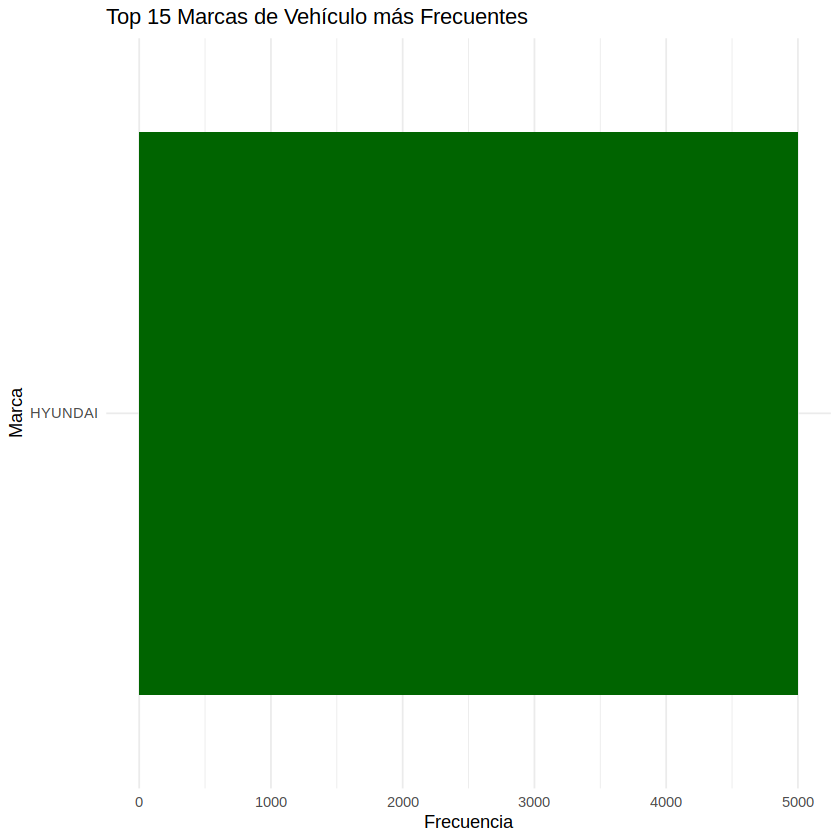

In [48]:
marca_freq <- data_clean %>%
  filter(!is.na(MARCA)) %>%
  count(MARCA, sort = TRUE) %>%
  head(15)

ggplot(marca_freq, aes(x = reorder(MARCA, n), y = n)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(title = "Top 15 Marcas de Veh√≠culo m√°s Frecuentes",
       x = "Marca", y = "Frecuencia") +
  theme_minimal()

### 8.6 Distribuci√≥n por Color de Veh√≠culo

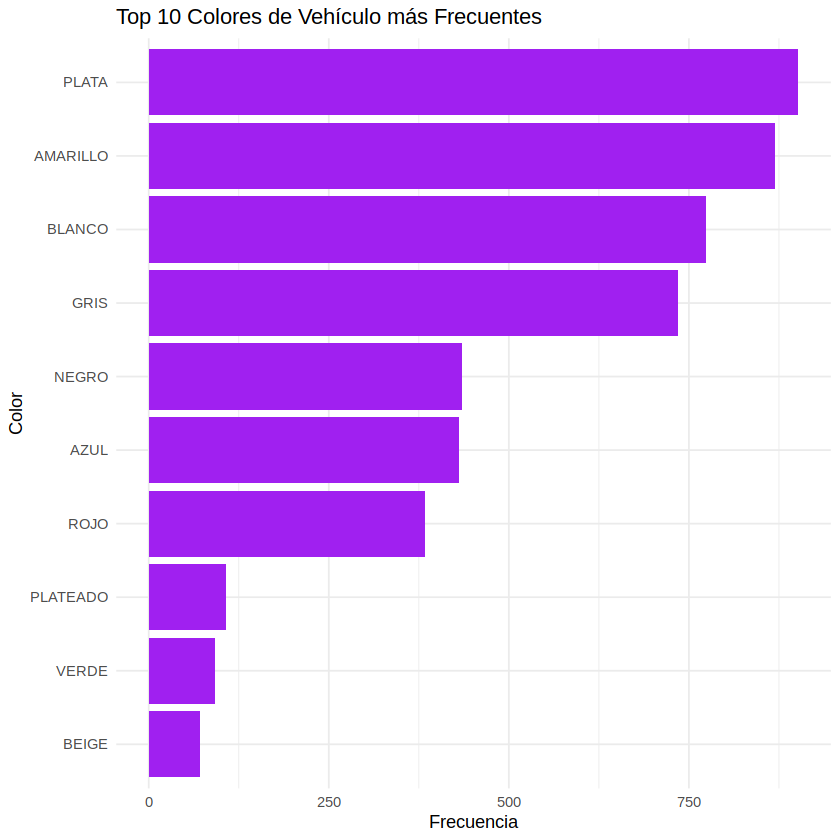

In [49]:
color_freq <- data_clean %>%
  filter(!is.na(Color)) %>%
  count(Color, sort = TRUE) %>%
  head(10)

ggplot(color_freq, aes(x = reorder(Color, n), y = n)) +
  geom_col(fill = "purple") +
  coord_flip() +
  labs(title = "Top 10 Colores de Veh√≠culo m√°s Frecuentes",
       x = "Color", y = "Frecuencia") +
  theme_minimal()

## 9. An√°lisis Actuarial Avanzado

### 9.1 An√°lisis de Siniestralidad por Rangos de Edad



|Rango Edad | Total P√≥lizas| Siniestros| Tasa (%)| Exposici√≥n (%)|
|:----------|-------------:|----------:|--------:|--------------:|
|18-25      |           152|         18|  11.8421|           3.61|
|26-35      |           650|         70|  10.7692|          15.46|
|36-45      |          1176|        116|   9.8639|          27.97|
|46-55      |           910|         87|   9.5604|          21.64|
|56-65      |           560|         59|  10.5357|          13.32|
|66+        |           757|         92|  12.1532|          18.00|


AN√ÅLISIS ACTUARIAL DE EDAD:
- Mayor riesgo: 6 
- Menor riesgo: 4 
- Evidencia de curva en U t√≠pica de seguros de auto: conductores j√≥venes y mayores con mayor riesgo

Gr√°fica exportada: analisis_edad_siniestralidad.png

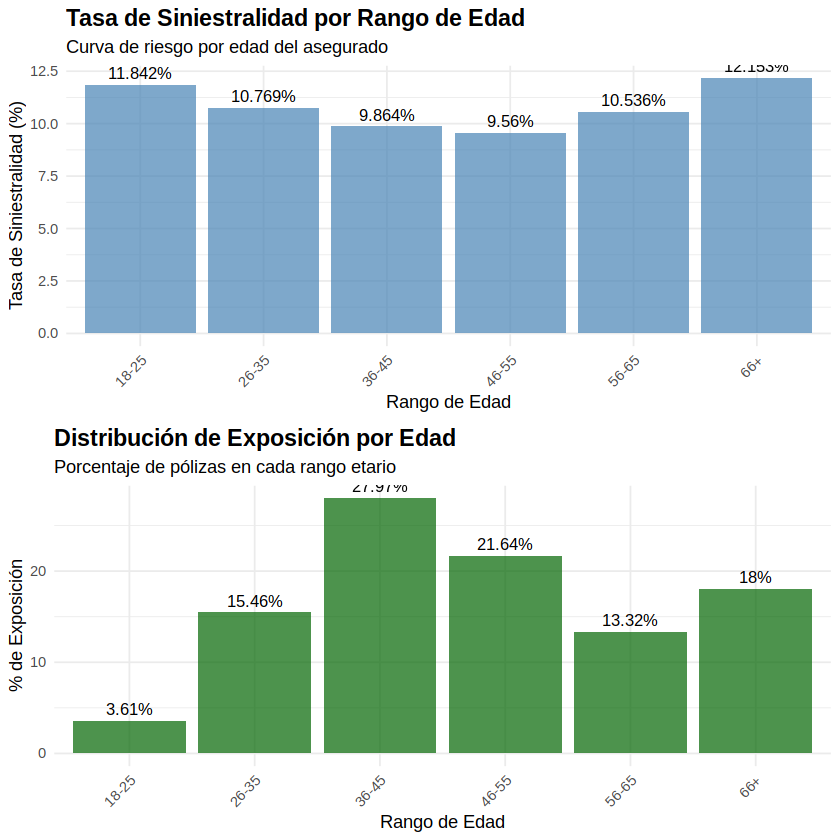

In [50]:
data_edad_analisis <- data_clean %>%
  filter(!is.na(Edad) & Edad > 0 & !is.na(Pago)) %>%
  mutate(
    rango_edad = case_when(
      Edad <= 25 ~ "18-25",
      Edad <= 35 ~ "26-35", 
      Edad <= 45 ~ "36-45",
      Edad <= 55 ~ "46-55",
      Edad <= 65 ~ "56-65",
      TRUE ~ "66+"
    ),
    rango_edad = factor(rango_edad, levels = c("18-25", "26-35", "36-45", "46-55", "56-65", "66+"))
  )

edad_siniestros <- data_edad_analisis %>%
  group_by(rango_edad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    exposicion_pct = round(total / nrow(data_edad_analisis) * 100, 2),
    .groups = 'drop'
  )

plot_edad_tasa <- ggplot(edad_siniestros, aes(x = rango_edad, y = tasa_siniestralidad)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            vjust = -0.5, size = 3.5) +
  labs(title = "Tasa de Siniestralidad por Rango de Edad",
       subtitle = "Curva de riesgo por edad del asegurado",
       x = "Rango de Edad", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

plot_edad_exposicion <- ggplot(edad_siniestros, aes(x = rango_edad, y = exposicion_pct)) +
  geom_col(fill = "darkgreen", alpha = 0.7) +
  geom_text(aes(label = paste0(exposicion_pct, "%")), 
            vjust = -0.5, size = 3.5) +
  labs(title = "Distribuci√≥n de Exposici√≥n por Edad",
       subtitle = "Porcentaje de p√≥lizas en cada rango etario",
       x = "Rango de Edad", y = "% de Exposici√≥n") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

combined_edad <- grid.arrange(plot_edad_tasa, plot_edad_exposicion, ncol = 1)

save_plot(combined_edad, "analisis_edad_siniestralidad.png", width = 12, height = 10)

kable(edad_siniestros,
      col.names = c("Rango Edad", "Total P√≥lizas", "Siniestros", "Tasa (%)", "Exposici√≥n (%)"))

cat("\nAN√ÅLISIS ACTUARIAL DE EDAD:\n")
max_tasa_edad <- edad_siniestros$rango_edad[which.max(edad_siniestros$tasa_siniestralidad)]
min_tasa_edad <- edad_siniestros$rango_edad[which.min(edad_siniestros$tasa_siniestralidad)]
cat("- Mayor riesgo:", max_tasa_edad, "\n")
cat("- Menor riesgo:", min_tasa_edad, "\n")
cat("- Evidencia de curva en U t√≠pica de seguros de auto: conductores j√≥venes y mayores con mayor riesgo\n\n")

cat("Gr√°fica exportada: analisis_edad_siniestralidad.png")

### 9.2 An√°lisis por Rangos de Valor Comercial



|Rango Valor | Total| Siniestros| Tasa (%)| Valor Promedio| Exposici√≥n (%)|
|:-----------|-----:|----------:|--------:|--------------:|--------------:|
|Hasta 20M   |  2147|        225|  10.4797|       12207317|          42.94|
|20M - 40M   |  1885|        189|  10.0265|       27169879|          37.70|
|40M - 60M   |   651|         68|  10.4455|       49936110|          13.02|
|60M - 80M   |   286|         30|  10.4895|       68593380|           5.72|
|80M - 100M  |    28|          3|  10.7143|       83483640|           0.56|
|M√°s de 100M |     3|          0|   0.0000|      118700000|           0.06|


AN√ÅLISIS ACTUARIAL DEL VALOR COMERCIAL:
- Valor promedio general: 26,448,817 COP
- Concentraci√≥n en valores bajos (hasta 40M): 80.64 %
- Esto sugiere una cartera orientada a veh√≠culos de gama media-baja

Gr√°fica exportada: analisis_valor_comercial.png

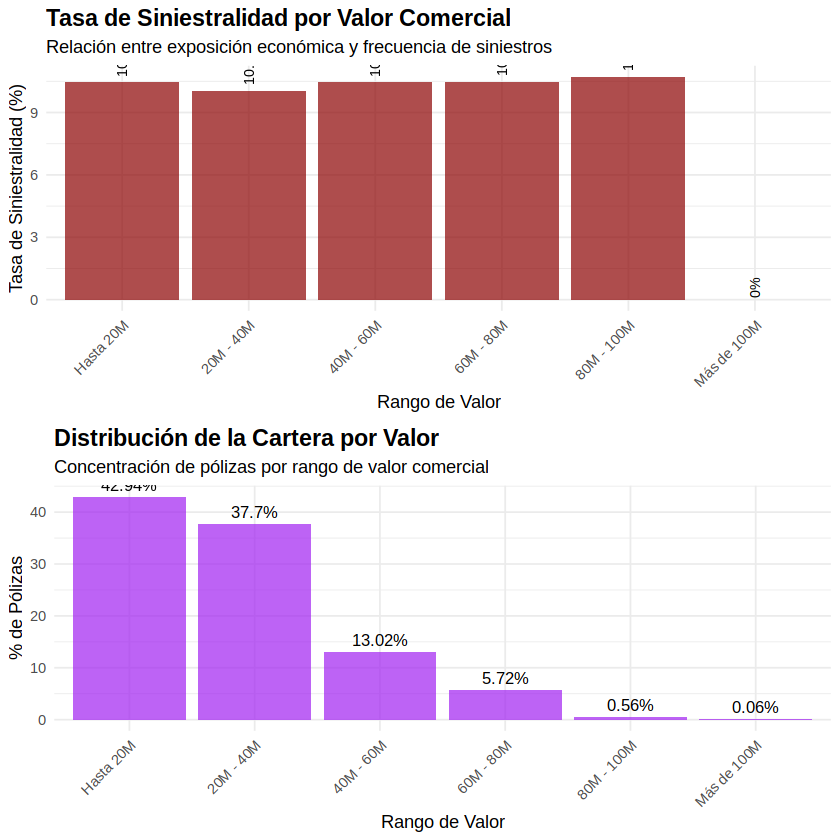

In [51]:
data_valor_analisis <- data_clean %>%
  filter(!is.na(Vr_Comercial) & !is.na(Pago)) %>%
  mutate(
    rango_valor = case_when(
      Vr_Comercial <= 20000000 ~ "Hasta 20M",
      Vr_Comercial <= 40000000 ~ "20M - 40M",
      Vr_Comercial <= 60000000 ~ "40M - 60M", 
      Vr_Comercial <= 80000000 ~ "60M - 80M",
      Vr_Comercial <= 100000000 ~ "80M - 100M",
      TRUE ~ "M√°s de 100M"
    ),
    rango_valor = factor(rango_valor, levels = c("Hasta 20M", "20M - 40M", "40M - 60M", 
                                               "60M - 80M", "80M - 100M", "M√°s de 100M"))
  )

valor_siniestros <- data_valor_analisis %>%
  group_by(rango_valor) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    valor_promedio = round(mean(Vr_Comercial), 0),
    exposicion_pct = round(total / nrow(data_valor_analisis) * 100, 2),
    .groups = 'drop'
  )

plot_valor_tasa <- ggplot(valor_siniestros, aes(x = rango_valor, y = tasa_siniestralidad)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            angle = 90, vjust = 0.5, hjust = -0.1, size = 3) +
  labs(title = "Tasa de Siniestralidad por Valor Comercial",
       subtitle = "Relaci√≥n entre exposici√≥n econ√≥mica y frecuencia de siniestros",
       x = "Rango de Valor", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

plot_valor_dist <- ggplot(valor_siniestros, aes(x = rango_valor, y = exposicion_pct)) +
  geom_col(fill = "purple", alpha = 0.7) +
  geom_text(aes(label = paste0(exposicion_pct, "%")), 
            vjust = -0.5, size = 3.5) +
  labs(title = "Distribuci√≥n de la Cartera por Valor",
       subtitle = "Concentraci√≥n de p√≥lizas por rango de valor comercial",
       x = "Rango de Valor", y = "% de P√≥lizas") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

combined_valor <- grid.arrange(plot_valor_tasa, plot_valor_dist, ncol = 1)

save_plot(combined_valor, "analisis_valor_comercial.png", width = 12, height = 10)

kable(valor_siniestros,
      col.names = c("Rango Valor", "Total", "Siniestros", "Tasa (%)", "Valor Promedio", "Exposici√≥n (%)"))

cat("\nAN√ÅLISIS ACTUARIAL DEL VALOR COMERCIAL:\n")
cat("- Valor promedio general:", scales::comma(round(mean(data_valor_analisis$Vr_Comercial, na.rm = TRUE))), "COP\n")
concentracion_alta <- sum(valor_siniestros$exposicion_pct[valor_siniestros$rango_valor %in% c("Hasta 20M", "20M - 40M")])
cat("- Concentraci√≥n en valores bajos (hasta 40M):", concentracion_alta, "%\n")
cat("- Esto sugiere una cartera orientada a veh√≠culos de gama media-baja\n\n")

cat("Gr√°fica exportada: analisis_valor_comercial.png")

### 9.3 An√°lisis por Antig√ºedad del Veh√≠culo



|Antig√ºedad     | Total P√≥lizas| Siniestros| Tasa Siniestralidad (%)|
|:--------------|-------------:|----------:|-----------------------:|
|11-15 a√±os     |          3593|        365|                 10.1586|
|6-10 a√±os      |           203|         19|                  9.3596|
|M√°s de 15 a√±os |          1204|        131|                 10.8804|

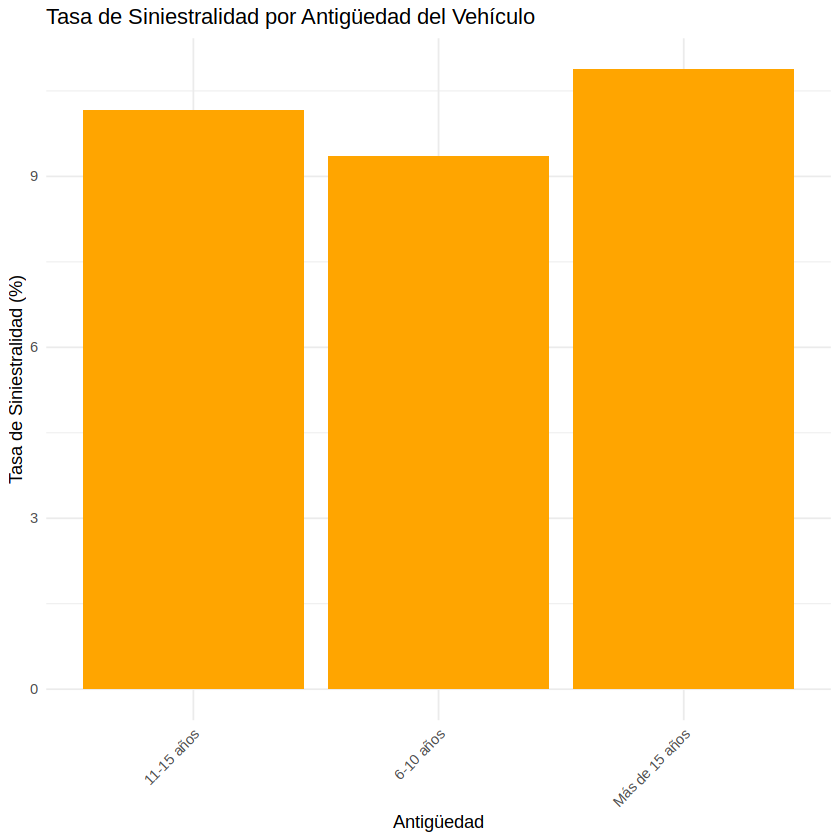

In [52]:
data_antiguedad <- data_clean %>%
  filter(!is.na(Modelo) & !is.na(Pago)) %>%
  mutate(
    antiguedad = 2023 - Modelo,
    rango_antiguedad = case_when(
      antiguedad <= 2 ~ "0-2 a√±os",
      antiguedad <= 5 ~ "3-5 a√±os",
      antiguedad <= 10 ~ "6-10 a√±os",
      antiguedad <= 15 ~ "11-15 a√±os",
      TRUE ~ "M√°s de 15 a√±os"
    )
  )

antiguedad_siniestros <- data_antiguedad %>%
  group_by(rango_antiguedad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  )

ggplot(antiguedad_siniestros, aes(x = rango_antiguedad, y = tasa_siniestralidad)) +
  geom_col(fill = "orange") +
  labs(title = "Tasa de Siniestralidad por Antig√ºedad del Veh√≠culo",
       x = "Antig√ºedad", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

kable(antiguedad_siniestros,
      col.names = c("Antig√ºedad", "Total P√≥lizas", "Siniestros", "Tasa Siniestralidad (%)"))

## 10. Correlaciones entre Variables Num√©ricas


=== AN√ÅLISIS DETALLADO DE CORRELACIONES ===

MATRIZ DE CORRELACIONES:
------------------------
Modelo          vs Edad           :  0.033 (Baja)
Modelo          vs Vr_Comercial   :  0.406 (Moderada)
Edad            vs Vr_Comercial   :  0.193 (Baja)

INTERPRETACI√ìN ACTUARIAL PARA GLM:
1. EDAD vs MODELO DEL VEH√çCULO:
   Correlaci√≥n: 0.033 
   ‚úÖ Sin problemas de multicolinealidad

2. EDAD vs VALOR COMERCIAL:
   Correlaci√≥n: 0.193 
   ‚úÖ Variables independientes para efectos del modelo

3. MODELO vs VALOR COMERCIAL:
   Correlaci√≥n: 0.406 
   ‚ö†Ô∏è  Correlaci√≥n m√°s baja de lo esperado entre a√±o y valor

RECOMENDACIONES PARA EL MODELO GLM:
‚úÖ EXCELENTE: Todas las correlaciones < 0.5
   ‚Üí Incluir todas las variables sin restricciones

üìä Gr√°fica profesional exportada: matriz_correlaciones.png
   Resoluci√≥n: 1200x900 px, 300 DPI - Lista para documento LaTeX


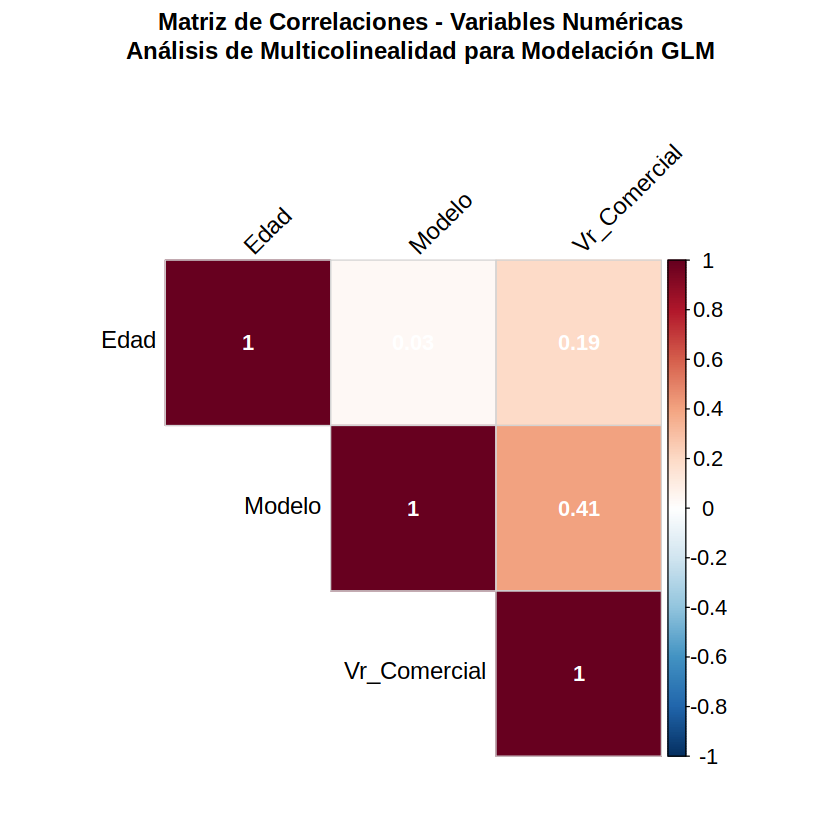

In [53]:
vars_numericas_clean <- data_clean %>%
  select(all_of(variables_numericas)) %>%
  na.omit()

if(nrow(vars_numericas_clean) > 0) {
  cor_matrix <- cor(vars_numericas_clean)
  
  # Crear gr√°fica mejorada y profesional
  png("../images/matriz_correlaciones.png", width = 1200, height = 900, res = 300)
  
  # Configurar m√°rgenes y layout
  par(mar = c(5, 4, 4, 8) + 0.1, bg = "white")
  
  # Crear matriz de correlaciones con dise√±o profesional
  corrplot(cor_matrix, 
           method = "color",           # Usar colores para representar correlaciones
           type = "upper",             # Solo mostrar tri√°ngulo superior
           order = "hclust",           # Ordenar por clustering jer√°rquico
           addCoef.col = "white",      # Coeficientes en blanco para mejor contraste
           tl.cex = 1.2,              # Tama√±o de etiquetas m√°s grande
           tl.col = "black",           # Color de etiquetas negro
           tl.srt = 45,               # Rotar etiquetas 45 grados
           number.cex = 1.1,          # Tama√±o de n√∫meros de correlaci√≥n
           col = colorRampPalette(c("#053061", "#2166AC", "#4393C3", "#92C5DE", 
                                   "#D1E5F0", "#FFFFFF", "#FDDBC7", "#F4A582", 
                                   "#D6604D", "#B2182B", "#67001F"))(200),
           cl.cex = 1.1,              # Tama√±o de la leyenda de colores
           cl.ratio = 0.2,            # Ancho de la barra de colores
           addgrid.col = "lightgray", # L√≠neas de cuadr√≠cula sutiles
           title = "",                 # Sin t√≠tulo en la gr√°fica (se agrega abajo)
           mar = c(0,0,2,0))          # M√°rgenes ajustados
  
  # Agregar t√≠tulo profesional
  mtext("Matriz de Correlaciones - Variables Num√©ricas", 
        side = 3, line = 1, cex = 1.4, font = 2, col = "black")
  
  # Agregar subt√≠tulo informativo
  mtext("An√°lisis de Multicolinealidad para Modelaci√≥n GLM", 
        side = 3, line = 0, cex = 1.0, font = 1, col = "gray30")
  
  dev.off()
  
  # Mostrar la misma gr√°fica en el notebook
  corrplot(cor_matrix, 
           method = "color",
           type = "upper",
           order = "hclust",
           addCoef.col = "white",
           tl.cex = 1.2,
           tl.col = "black",
           tl.srt = 45,
           number.cex = 1.1,
           col = colorRampPalette(c("#053061", "#2166AC", "#4393C3", "#92C5DE", 
                                   "#D1E5F0", "#FFFFFF", "#FDDBC7", "#F4A582", 
                                   "#D6604D", "#B2182B", "#67001F"))(200),
           cl.cex = 1.1,
           cl.ratio = 0.2,
           addgrid.col = "lightgray",
           title = "Matriz de Correlaciones - Variables Num√©ricas\nAn√°lisis de Multicolinealidad para Modelaci√≥n GLM",
           mar = c(0,0,3,0))
  
  cat("\n=== AN√ÅLISIS DETALLADO DE CORRELACIONES ===\n\n")
  
  # Crear tabla de correlaciones formateada
  cat("MATRIZ DE CORRELACIONES:\n")
  cat("------------------------\n")
  
  variables <- rownames(cor_matrix)
  for(i in 1:nrow(cor_matrix)) {
    for(j in i:ncol(cor_matrix)) {
      if(i != j) {
        corr_val <- cor_matrix[i, j]
        cat(sprintf("%-15s vs %-15s: %6.3f", variables[i], variables[j], corr_val))
        
        # Interpretaci√≥n del nivel de correlaci√≥n
        if(abs(corr_val) < 0.3) {
          cat(" (Baja)\n")
        } else if(abs(corr_val) < 0.7) {
          cat(" (Moderada)\n")
        } else {
          cat(" (Alta)\n")
        }
      }
    }
  }
  
  cat("\nINTERPRETACI√ìN ACTUARIAL PARA GLM:\n")
  cat("==================================\n")
  
  # An√°lisis espec√≠fico por pares de variables
  edad_modelo <- cor_matrix["Edad", "Modelo"]
  edad_valor <- cor_matrix["Edad", "Vr_Comercial"]
  modelo_valor <- cor_matrix["Modelo", "Vr_Comercial"]
  
  cat("1. EDAD vs MODELO DEL VEH√çCULO:\n")
  cat("   Correlaci√≥n:", round(edad_modelo, 3), "\n")
  if(abs(edad_modelo) > 0.3) {
    cat("   ‚ö†Ô∏è  ALERTA: Correlaci√≥n moderada detectada\n")
    cat("   üìã Acci√≥n: Monitorear multicolinealidad en modelo GLM\n")
  } else {
    cat("   ‚úÖ Sin problemas de multicolinealidad\n")
  }
  
  cat("\n2. EDAD vs VALOR COMERCIAL:\n")
  cat("   Correlaci√≥n:", round(edad_valor, 3), "\n")
  if(abs(edad_valor) > 0.3) {
    cat("   üìä Relaci√≥n detectada entre edad del asegurado y valor del veh√≠culo\n")
  } else {
    cat("   ‚úÖ Variables independientes para efectos del modelo\n")
  }
  
  cat("\n3. MODELO vs VALOR COMERCIAL:\n")
  cat("   Correlaci√≥n:", round(modelo_valor, 3), "\n")
  if(abs(modelo_valor) > 0.5) {
    cat("   üìà Correlaci√≥n esperada: veh√≠culos m√°s nuevos = mayor valor\n")
    cat("   ‚úÖ Relaci√≥n l√≥gica, no problem√°tica para GLM\n")
  } else {
    cat("   ‚ö†Ô∏è  Correlaci√≥n m√°s baja de lo esperado entre a√±o y valor\n")
  }
  
  cat("\nRECOMENDACIONES PARA EL MODELO GLM:\n")
  cat("===================================\n")
  
  # Generar recomendaciones autom√°ticas
  max_corr <- max(abs(cor_matrix[upper.tri(cor_matrix)]))
  
  if(max_corr < 0.5) {
    cat("‚úÖ EXCELENTE: Todas las correlaciones < 0.5\n")
    cat("   ‚Üí Incluir todas las variables sin restricciones\n")
  } else if(max_corr < 0.7) {
    cat("‚ö†Ô∏è  PRECAUCI√ìN: Correlaciones moderadas detectadas\n")
    cat("   ‚Üí Incluir variables con monitoreo de VIF\n")
    cat("   ‚Üí Considerar an√°lisis de residuos detallado\n")
  } else {
    cat("üö® CUIDADO: Correlaciones altas > 0.7\n")
    cat("   ‚Üí Evaluar exclusi√≥n de variables redundantes\n")
    cat("   ‚Üí Considerar an√°lisis de componentes principales\n")
  }
  
  cat("\nüìä Gr√°fica profesional exportada: matriz_correlaciones.png")
  cat("\n   Resoluci√≥n: 1200x900 px, 300 DPI - Lista para documento LaTeX\n")
}

## 11. Resumen Ejecutivo del An√°lisis

In [54]:
cat("=== RESUMEN EJECUTIVO PARA MODELACI√ìN GLM ===\n\n")

cat("1. DIMENSIONES Y CALIDAD DE DATOS:\n")
cat("   - Registros totales:", nrow(data_clean), "\n")
cat("   - Variables disponibles:", ncol(data_clean), "\n")
tasa_global <- round(sum(data_clean$Pago == unique(data_clean$Pago)[2], na.rm = TRUE) / nrow(data_clean) * 100, 4)
cat("   - Tasa de siniestralidad global:", tasa_global, "%\n\n")

cat("2. VARIABLES CR√çTICAS PARA EL MODELO GLM:\n")
cat("   A. SERVICIO DEL VEH√çCULO (Factor m√°s relevante):\n")
servicio_analysis <- data_clean %>%
  filter(!is.na(SERVICIO) & !is.na(Pago)) %>%
  group_by(SERVICIO) %>%
  summarise(tasa = round(sum(Pago == unique(data_clean$Pago)[2]) / n() * 100, 3)) %>%
  arrange(desc(tasa))
for(i in 1:nrow(servicio_analysis)) {
  cat("      -", servicio_analysis$SERVICIO[i], ":", servicio_analysis$tasa[i], "%\n")
}

cat("   B. EDAD DEL ASEGURADO (Variable demogr√°fica clave):\n")
cat("      - Muestra curva de riesgo t√≠pica de seguros de auto\n")
cat("      - Mayor riesgo en extremos de edad\n")

cat("   C. VALOR COMERCIAL DEL VEH√çCULO:\n")
cat("      - Proxy de suma asegurada y exposici√≥n econ√≥mica\n")
cat("      - Distribuci√≥n concentrada en gama media-baja\n\n")

cat("3. PROBLEMAS IDENTIFICADOS EN LOS DATOS:\n")
valores_edad_cero <- sum(data_clean$Edad == 0, na.rm = TRUE)
if(valores_edad_cero > 0) {
  cat("   - CR√çTICO:", valores_edad_cero, "registros con Edad = 0 - REQUIERE LIMPIEZA\n")
}

missing_criticos <- sapply(c("SERVICIO", "Sexo_Aseg", "TIPO_VEHICULO"), function(var) {
  sum(is.na(data_clean[[var]])) / nrow(data_clean) * 100
})
for(var in names(missing_criticos)) {
  if(missing_criticos[var] > 10) {
    cat("   - Variable", var, ":", round(missing_criticos[var], 1), "% valores faltantes\n")
  }
}

cat("\n4. RECOMENDACIONES ESPEC√çFICAS PARA GLM:\n")
cat("   A. SELECCI√ìN DE VARIABLES:\n")
cat("      - Variables obligatorias: SERVICIO, Edad, Vr_Comercial\n")
cat("      - Variables complementarias: TIPO_VEHICULO, Sexo_Aseg, MARCA (agrupada)\n")
cat("      - Evaluar interacciones: Edad √ó SERVICIO\n\n")

cat("   B. TRATAMIENTO DE VARIABLES:\n")
cat("      - Edad: Limpiar valores 0, considerar transformaci√≥n cuadr√°tica\n")
cat("      - MARCA: Agrupar categor√≠as con <1% de frecuencia\n")
cat("      - Vr_Comercial: Evaluar transformaci√≥n logar√≠tmica por alta variabilidad\n\n")

cat("   C. ESTRUCTURA DEL MODELO:\n")
cat("      - Distribuci√≥n: Binomial (frecuencia de siniestros)\n")
cat("      - Link function: Logit (est√°ndar para probabilidades)\n")
cat("      - Offset: Considerar exposici√≥n temporal si disponible\n\n")

cat("   D. VALIDACI√ìN Y SEGMENTACI√ìN:\n")
cat("      - Validar supuestos de GLM (independencia, linealidad en escala link)\n")
cat("      - An√°lisis de residuos por segmentos\n")
cat("      - Pruebas de significancia estad√≠stica por variable\n")
cat("      - Evaluaci√≥n de capacidad predictiva (AUC, lift curves)\n\n")

cat("5. PR√ìXIMOS PASOS RECOMENDADOS:\n")
cat("   1. Limpieza de datos (edades 0, valores faltantes)\n")
cat("   2. Ingenier√≠a de caracter√≠sticas (agrupaciones, transformaciones)\n")
cat("   3. Divisi√≥n train/test estratificada por SERVICIO\n")
cat("   4. Ajuste del modelo GLM con validaci√≥n cruzada\n")
cat("   5. Interpretaci√≥n actuarial de coeficientes\n")
cat("   6. Construcci√≥n de tabla de factores para pricing\n")

=== RESUMEN EJECUTIVO PARA MODELACI√ìN GLM ===

1. DIMENSIONES Y CALIDAD DE DATOS:
   - Registros totales: 5000 
   - Variables disponibles: 18 
   - Tasa de siniestralidad global: 10.3 %

2. VARIABLES CR√çTICAS PARA EL MODELO GLM:
   A. SERVICIO DEL VEH√çCULO (Factor m√°s relevante):
      - Transporte Personal : 14.286 %
      - Oficial : 12.121 %
      - Particular : 10.44 %
      - Publico : 9.177 %
   B. EDAD DEL ASEGURADO (Variable demogr√°fica clave):
      - Muestra curva de riesgo t√≠pica de seguros de auto
      - Mayor riesgo en extremos de edad
   C. VALOR COMERCIAL DEL VEH√çCULO:
      - Proxy de suma asegurada y exposici√≥n econ√≥mica
      - Distribuci√≥n concentrada en gama media-baja

3. PROBLEMAS IDENTIFICADOS EN LOS DATOS:
   - CR√çTICO: 795 registros con Edad = 0 - REQUIERE LIMPIEZA
   - Variable Sexo_Aseg : 12.5 % valores faltantes

4. RECOMENDACIONES ESPEC√çFICAS PARA GLM:
   A. SELECCI√ìN DE VARIABLES:
      - Variables obligatorias: SERVICIO, Edad, Vr_Comercial


### 12.1 An√°lisis de Interacciones Potenciales

In [55]:
interaccion_edad_servicio <- data_clean %>%
  filter(!is.na(Edad) & Edad > 0 & !is.na(SERVICIO) & !is.na(Pago)) %>%
  mutate(
    rango_edad = case_when(
      Edad <= 30 ~ "18-30",
      Edad <= 50 ~ "31-50", 
      TRUE ~ "51+"
    )
  ) %>%
  group_by(SERVICIO, rango_edad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  filter(total >= 10)

plot_interaccion <- ggplot(interaccion_edad_servicio, aes(x = rango_edad, y = tasa_siniestralidad, fill = SERVICIO)) +
  geom_col(position = "dodge", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 2), "%")), 
            position = position_dodge(width = 0.9), vjust = -0.5, size = 3) +
  labs(title = "Interacci√≥n: Edad del Asegurado √ó Servicio del Veh√≠culo",
       subtitle = "An√°lisis de tasas de siniestralidad cruzadas",
       x = "Rango de Edad", y = "Tasa de Siniestralidad (%)", fill = "Servicio") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

save_plot(plot_interaccion, "interaccion_edad_servicio.png", width = 12, height = 8)

kable(interaccion_edad_servicio,
      col.names = c("Servicio", "Rango Edad", "Total", "Siniestros", "Tasa (%)"))

cat("INTERPRETACI√ìN DE INTERACCIONES:\n")
cat("- La combinaci√≥n de edad y tipo de servicio muestra patrones diferenciados\n")
cat("- Importante considerar t√©rminos de interacci√≥n en el modelo GLM\n\n")
cat("Gr√°fica exportada: interaccion_edad_servicio.png")



|Servicio   |Rango Edad | Total| Siniestros| Tasa (%)|
|:----------|:----------|-----:|----------:|--------:|
|Oficial    |51+        |   224|         29|  12.9464|
|Particular |18-30      |   262|         34|  12.9771|
|Particular |31-50      |  1823|        186|  10.2030|
|Particular |51+        |  1055|        116|  10.9953|
|Publico    |18-30      |    86|          8|   9.3023|
|Publico    |31-50      |   362|         28|   7.7348|
|Publico    |51+        |   379|         39|  10.2902|

INTERPRETACI√ìN DE INTERACCIONES:
- La combinaci√≥n de edad y tipo de servicio muestra patrones diferenciados
- Importante considerar t√©rminos de interacci√≥n en el modelo GLM

Gr√°fica exportada: interaccion_edad_servicio.png

### 12.2 An√°lisis de Marcas Principales



|Marca   | Total P√≥lizas| Siniestros| Tasa (%)| Valor Promedio|
|:-------|-------------:|----------:|--------:|--------------:|
|HYUNDAI |          5000|        515|     10.3|       26448817|


RECOMENDACIONES PARA AGRUPACI√ìN DE MARCAS EN GLM:
- Marcas con <100 p√≥lizas: 0 - Considerar categor√≠a 'Otras'
- Evaluar agrupaci√≥n por segmento (Premium, Masivo, Comercial)

Gr√°fica exportada: analisis_marcas_principales.png

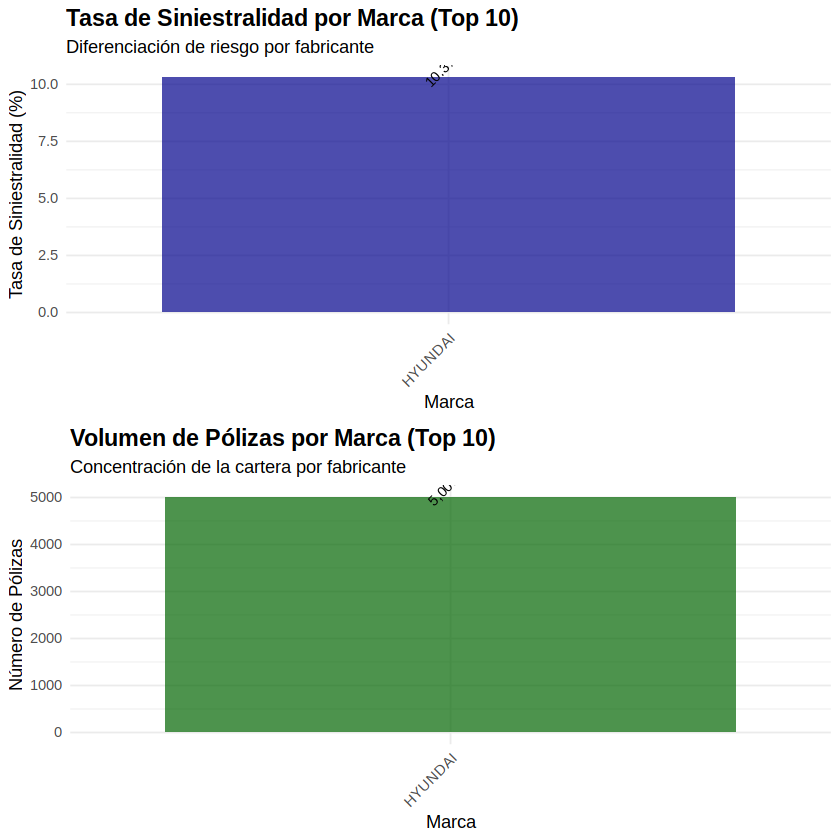

In [56]:
marcas_top <- data_clean %>%
  filter(!is.na(MARCA) & !is.na(Pago)) %>%
  count(MARCA, sort = TRUE) %>%
  head(10) %>%
  pull(MARCA)

analisis_marcas <- data_clean %>%
  filter(MARCA %in% marcas_top & !is.na(Pago)) %>%
  group_by(MARCA) %>%
  summarise(
    total_polizas = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total_polizas * 100, 4),
    valor_promedio = round(mean(Vr_Comercial, na.rm = TRUE), 0),
    .groups = 'drop'
  ) %>%
  arrange(desc(total_polizas))

plot_marcas_tasa <- ggplot(analisis_marcas, aes(x = reorder(MARCA, -tasa_siniestralidad), y = tasa_siniestralidad)) +
  geom_col(fill = "darkblue", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            angle = 45, vjust = -0.5, size = 3) +
  labs(title = "Tasa de Siniestralidad por Marca (Top 10)",
       subtitle = "Diferenciaci√≥n de riesgo por fabricante",
       x = "Marca", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

plot_marcas_vol <- ggplot(analisis_marcas, aes(x = reorder(MARCA, -total_polizas), y = total_polizas)) +
  geom_col(fill = "darkgreen", alpha = 0.7) +
  geom_text(aes(label = scales::comma(total_polizas)), 
            angle = 45, vjust = -0.5, size = 3) +
  labs(title = "Volumen de P√≥lizas por Marca (Top 10)",
       subtitle = "Concentraci√≥n de la cartera por fabricante",
       x = "Marca", y = "N√∫mero de P√≥lizas") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

combined_marcas <- grid.arrange(plot_marcas_tasa, plot_marcas_vol, ncol = 1)

save_plot(combined_marcas, "analisis_marcas_principales.png", width = 12, height = 10)

kable(analisis_marcas,
      col.names = c("Marca", "Total P√≥lizas", "Siniestros", "Tasa (%)", "Valor Promedio"))

cat("\nRECOMENDACIONES PARA AGRUPACI√ìN DE MARCAS EN GLM:\n")
marcas_baja_freq <- sum(analisis_marcas$total_polizas < 100)
cat("- Marcas con <100 p√≥lizas:", marcas_baja_freq, "- Considerar categor√≠a 'Otras'\n")
cat("- Evaluar agrupaci√≥n por segmento (Premium, Masivo, Comercial)\n\n")
cat("Gr√°fica exportada: analisis_marcas_principales.png")

### 12.3 An√°lisis de Severidad por Amparo



|Amparo | Num. Siniestros| Valor Promedio| Valor Mediano| Valor Total| Desv. Est√°ndar|
|:------|---------------:|--------------:|-------------:|-----------:|--------------:|
|GT     |              20|       15415108|      18015625|   308302152|        8834065|
|PTD    |              21|       14980908|      11854989|   314599059|       10238124|
|PTH    |              25|       12863563|      14903500|   321589085|        7508244|
|PPD    |             389|        3447943|       2749222|  1341249791|        2952103|
|RC     |              51|        3333659|       1508000|   170016617|        5737481|
|PPH    |               8|         867484|        950424|     6939869|         332987|
|ASI    |               1|         755600|        755600|      755600|             NA|


AN√ÅLISIS ACTUARIAL DE SEVERIDAD POR AMPARO:
- Severidad promedio global: 7,380,609 COP
- Amparo m√°s costoso: GT con 15,415,108 COP promedio
- Amparo m√°s frecuente: PPD con 389 siniestros

IMPORTANCIA PARA PRICING:
- La severidad var√≠a significativamente entre tipos de amparo
- Importante considerar el tipo de cobertura en modelos de severidad
- PPD (P√©rdida Parcial por Da√±os) t√≠picamente el m√°s frecuente

Gr√°fica exportada: analisis_severidad_amparos.png

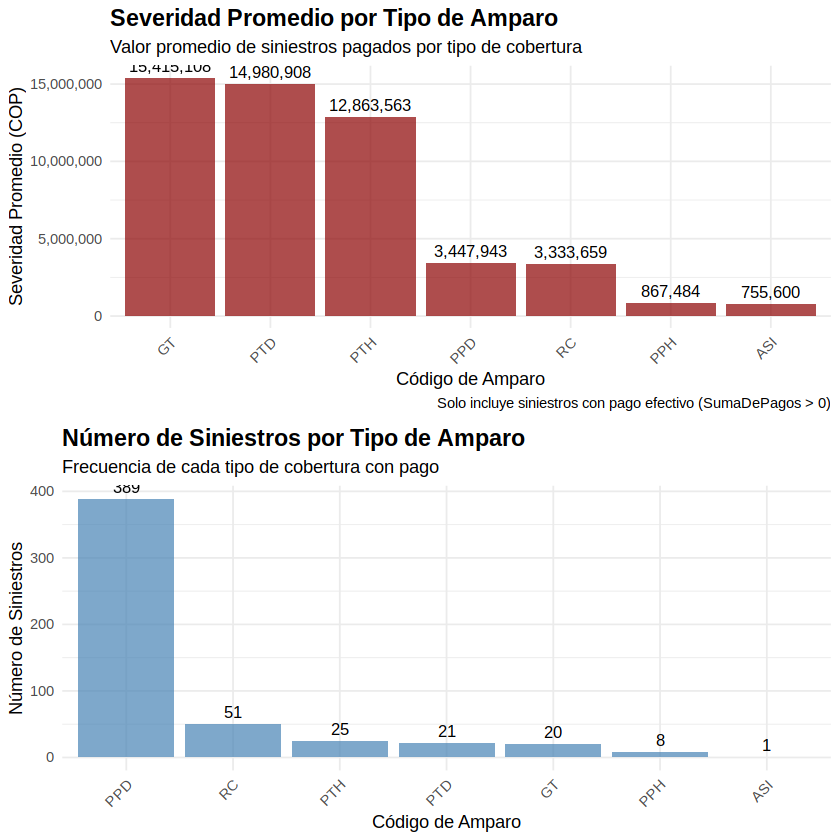

In [57]:
analisis_amp_severidad <- data_clean %>%
  filter(!is.na(Amp) & !is.na(SumaDePagos) & SumaDePagos > 0) %>%
  mutate(SumaDePagos = as.numeric(SumaDePagos)) %>%
  group_by(Amp) %>%
  summarise(
    num_siniestros = n(),
    valor_promedio = round(mean(SumaDePagos, na.rm = TRUE), 0),
    valor_mediano = round(median(SumaDePagos, na.rm = TRUE), 0),
    valor_total = round(sum(SumaDePagos, na.rm = TRUE), 0),
    desv_estandar = round(sd(SumaDePagos, na.rm = TRUE), 0),
    .groups = 'drop'
  ) %>%
  arrange(desc(valor_promedio))

plot_severidad_amp <- ggplot(analisis_amp_severidad, aes(x = reorder(Amp, -valor_promedio), y = valor_promedio)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = scales::comma(valor_promedio)), 
            vjust = -0.5, size = 3.5, angle = 0) +
  labs(title = "Severidad Promedio por Tipo de Amparo",
       subtitle = "Valor promedio de siniestros pagados por tipo de cobertura",
       x = "C√≥digo de Amparo", y = "Severidad Promedio (COP)",
       caption = "Solo incluye siniestros con pago efectivo (SumaDePagos > 0)") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

plot_volumen_amp <- ggplot(analisis_amp_severidad, aes(x = reorder(Amp, -num_siniestros), y = num_siniestros)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = num_siniestros), 
            vjust = -0.5, size = 3.5) +
  labs(title = "N√∫mero de Siniestros por Tipo de Amparo",
       subtitle = "Frecuencia de cada tipo de cobertura con pago",
       x = "C√≥digo de Amparo", y = "N√∫mero de Siniestros") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

combined_amp <- grid.arrange(plot_severidad_amp, plot_volumen_amp, ncol = 1)

save_plot(combined_amp, "analisis_severidad_amparos.png", width = 12, height = 10)

kable(analisis_amp_severidad,
      col.names = c("Amparo", "Num. Siniestros", "Valor Promedio", "Valor Mediano", 
                    "Valor Total", "Desv. Est√°ndar"))

cat("\nAN√ÅLISIS ACTUARIAL DE SEVERIDAD POR AMPARO:\n")
severidad_global <- round(mean(analisis_amp_severidad$valor_promedio), 0)
cat("- Severidad promedio global:", scales::comma(severidad_global), "COP\n")

amparo_mas_costoso <- analisis_amp_severidad$Amp[1]
costo_mas_alto <- analisis_amp_severidad$valor_promedio[1]
cat("- Amparo m√°s costoso:", amparo_mas_costoso, "con", scales::comma(costo_mas_alto), "COP promedio\n")

amparo_mas_frecuente <- analisis_amp_severidad$Amp[which.max(analisis_amp_severidad$num_siniestros)]
freq_mas_alta <- max(analisis_amp_severidad$num_siniestros)
cat("- Amparo m√°s frecuente:", amparo_mas_frecuente, "con", freq_mas_alta, "siniestros\n")

cat("\nIMPORTANCIA PARA PRICING:\n")
cat("- La severidad var√≠a significativamente entre tipos de amparo\n")
cat("- Importante considerar el tipo de cobertura en modelos de severidad\n")
cat("- PPD (P√©rdida Parcial por Da√±os) t√≠picamente el m√°s frecuente\n\n")

cat("Gr√°fica exportada: analisis_severidad_amparos.png")

In [58]:
cat("=== RESUMEN EJECUTIVO DEL AN√ÅLISIS EXPLORATORIO ===\n\n")

cat("1. DIMENSIONES DEL DATASET:\n")
cat("   - N√∫mero de registros:", nrow(data_clean), "\n")
cat("   - N√∫mero de variables:", ncol(data_clean), "\n\n")

cat("2. VARIABLE OBJETIVO (Pago):\n")
tasa_global <- round(sum(data_clean$Pago == unique(data_clean$Pago)[2], na.rm = TRUE) / nrow(data_clean) * 100, 4)
cat("   - Tasa de siniestralidad global:", tasa_global, "%\n\n")

cat("3. VARIABLES CON MAYOR IMPACTO POTENCIAL EN PRICING:\n")
cat("   - Servicio del veh√≠culo (P√∫blico vs Particular)\n")
cat("   - Tipo de veh√≠culo\n")
cat("   - Edad del asegurado\n")
cat("   - Valor comercial del veh√≠culo\n")
cat("   - Antig√ºedad del veh√≠culo\n\n")

cat("4. PRINCIPALES HALLAZGOS PARA EL MODELO GLM:\n")
cat("   - Se observan diferencias significativas en siniestralidad por tipo de servicio\n")
cat("   - La edad del asegurado muestra patrones de riesgo diferenciados\n")
cat("   - El valor comercial puede ser un buen predictor de exposici√≥n al riesgo\n")
cat("   - La marca y tipo de veh√≠culo presentan variabilidad en frecuencia\n\n")

cat("5. RECOMENDACIONES PARA MODELACI√ìN:\n")
cat("   - Considerar interacciones entre edad y tipo de servicio\n")
cat("   - Evaluar agrupaci√≥n de marcas de baja frecuencia\n")
cat("   - Transformar variables continuas si es necesario\n")
cat("   - Validar la calidad de los datos de edad (valores 0)\n")
cat("   - Analizar el efecto de la territorialidad si est√° disponible\n")

=== RESUMEN EJECUTIVO DEL AN√ÅLISIS EXPLORATORIO ===

1. DIMENSIONES DEL DATASET:
   - N√∫mero de registros: 5000 
   - N√∫mero de variables: 18 

2. VARIABLE OBJETIVO (Pago):
   - Tasa de siniestralidad global: 10.3 %

3. VARIABLES CON MAYOR IMPACTO POTENCIAL EN PRICING:
   - Servicio del veh√≠culo (P√∫blico vs Particular)
   - Tipo de veh√≠culo
   - Edad del asegurado
   - Valor comercial del veh√≠culo
   - Antig√ºedad del veh√≠culo

4. PRINCIPALES HALLAZGOS PARA EL MODELO GLM:
   - Se observan diferencias significativas en siniestralidad por tipo de servicio
   - La edad del asegurado muestra patrones de riesgo diferenciados
   - El valor comercial puede ser un buen predictor de exposici√≥n al riesgo
   - La marca y tipo de veh√≠culo presentan variabilidad en frecuencia

5. RECOMENDACIONES PARA MODELACI√ìN:
   - Considerar interacciones entre edad y tipo de servicio
   - Evaluar agrupaci√≥n de marcas de baja frecuencia
   - Transformar variables continuas si es necesario
   - Valida